### ⚽️ French Football First League prediction 

In [ ]:
#lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df_2425 = pd.read_csv("./season-2425.csv")
df_2324 = pd.read_csv("./season-2324.csv")

#lets merge the two datasets
df_combined = pd.concat([df_2324, df_2425], ignore_index=True)

#anomalies in the data
#missing columns
print("Colonnes manquantes dans chaque dataset :")
print("2324 :", set(df_2425.columns) - set(df_2324.columns))
print("2425 :", set(df_2324.columns) - set(df_2425.columns))

#missing values
missing_values = df_combined.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

#doubles
duplicates = df_combined.duplicated().sum()
print("\nNombre de lignes dupliquées :", duplicates)

#inconsistencies
invalid_results = df_combined[
    (df_combined["FTHG"] < 0) | (df_combined["FTAG"] < 0) | 
    (df_combined["HTHG"] < 0) | (df_combined["HTAG"] < 0) |
    (~df_combined["FTR"].isin(["H", "A", "D"]))
]

if not invalid_results.empty:
    print("\nAnomalies détectées dans les résultats :")
    print(invalid_results)

#save
df_combined.to_csv("ligue1_merged.csv", index=False)

print("\nMerge and verification successful .")


Colonnes manquantes dans chaque dataset :
2324 : set()
2425 : set()

Valeurs manquantes par colonne :
Referee    548
dtype: int64

Nombre de lignes dupliquées : 0

Merge and verification successful .


Now that we have our dataset, let's get rid of the data we won't need or which are not relevant for our study 

In [6]:
df = pd.read_csv("./ligue1_merged.csv")

# columns to drop
columns_to_drop = ["Date", "HTHG", "HTAG", "HTR", "Referee"]


df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset
print(df.head())

    HomeTeam AwayTeam  FTHG  FTAG FTR  HS  AS  HST  AST  HF  AF  HC  AC  HY  \
0       Nice    Lille     1     1   D   8  12    3    5  13   9   3   3   3   
1  Marseille    Reims     2     1   H  14  11    4    4   7  16  10  10   1   
2   Paris SG  Lorient     0     0   D  20   4    4    0   8   6   9   2   0   
3      Brest     Lens     3     2   H  15  10    8    2  13  15   6   8   2   
4   Clermont   Monaco     2     4   A  15  14    7    8   7  16   6   2   0   

   AY  HR  AR  
0   2   0   0  
1   3   0   0  
2   0   0   0  
3   3   0   1  
4   4   0   0  


/var/folders/b8/2kssmks15bs1tf84rq45rrxr0000gn/T/ipykernel_62230/1461513867.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["FTR"], palette="pastel")


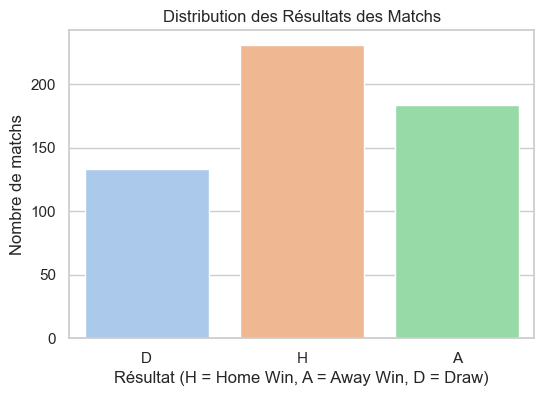

/var/folders/b8/2kssmks15bs1tf84rq45rrxr0000gn/T/ipykernel_62230/1461513867.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["HomeTeam"], order=df["HomeTeam"].value_counts().index, palette="coolwarm")


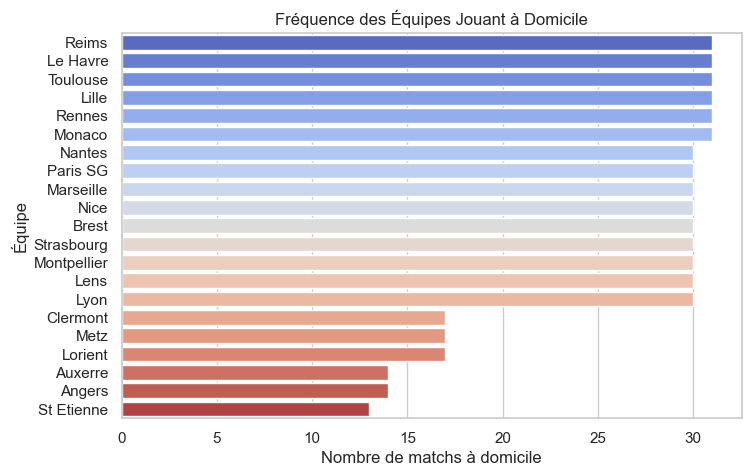

/var/folders/b8/2kssmks15bs1tf84rq45rrxr0000gn/T/ipykernel_62230/1461513867.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["AwayTeam"], order=df["AwayTeam"].value_counts().index, palette="coolwarm")


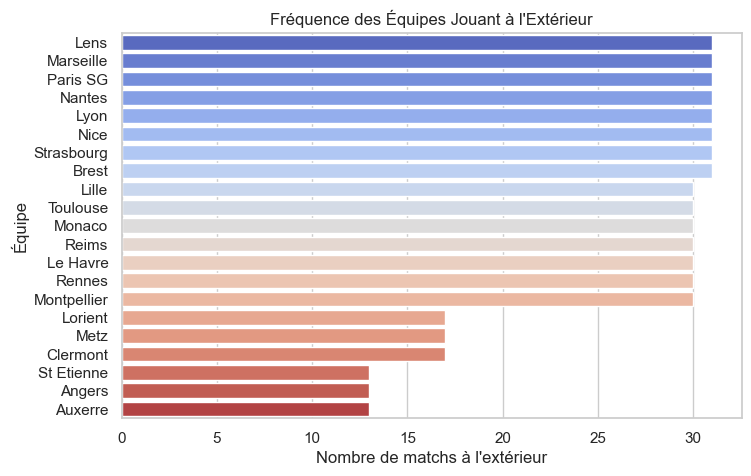

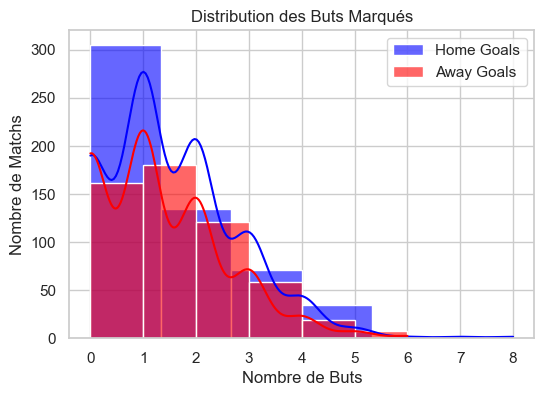

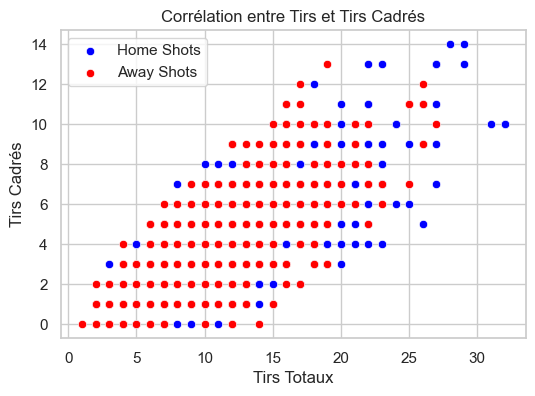

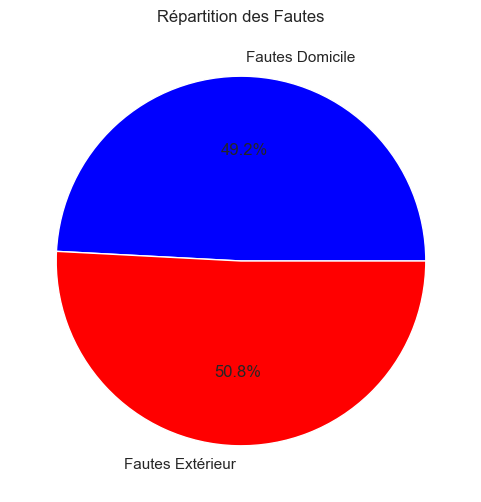

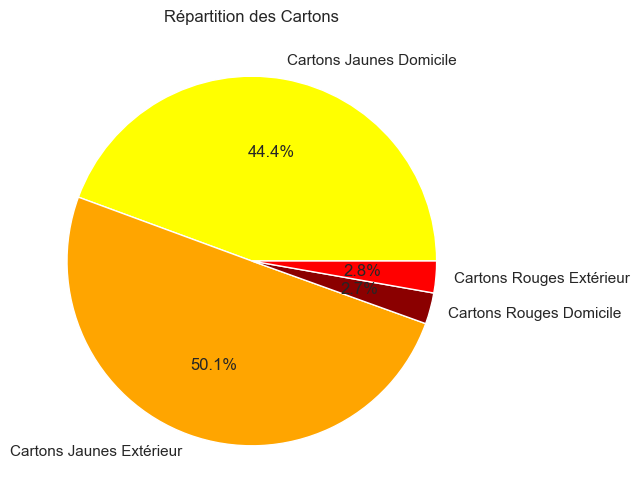

In [8]:
# Set style
sns.set(style="whitegrid")

# résultats des matchs (Full Time Result - FTR)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["FTR"], palette="pastel")
plt.title("Distribution des Résultats des Matchs")
plt.xlabel("Résultat (H = Home Win, A = Away Win, D = Draw)")
plt.ylabel("Nombre de matchs")
plt.show()

# répartition des équipes à domicile
plt.figure(figsize=(8, 5))
sns.countplot(y=df["HomeTeam"], order=df["HomeTeam"].value_counts().index, palette="coolwarm")
plt.title("Fréquence des Équipes Jouant à Domicile")
plt.xlabel("Nombre de matchs à domicile")
plt.ylabel("Équipe")
plt.show()

# répartition des équipes à l'extérieur
plt.figure(figsize=(8, 5))
sns.countplot(y=df["AwayTeam"], order=df["AwayTeam"].value_counts().index, palette="coolwarm")
plt.title("Fréquence des Équipes Jouant à l'Extérieur")
plt.xlabel("Nombre de matchs à l'extérieur")
plt.ylabel("Équipe")
plt.show()

# buts marqués par match
plt.figure(figsize=(6, 4))
sns.histplot(df["FTHG"], bins=6, kde=True, color="blue", label="Home Goals", alpha=0.6)
sns.histplot(df["FTAG"], bins=6, kde=True, color="red", label="Away Goals", alpha=0.6)
plt.title("Distribution des Buts Marqués")
plt.xlabel("Nombre de Buts")
plt.ylabel("Nombre de Matchs")
plt.legend()
plt.show()

# nombre de tirs et tirs cadrés
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["HS"], y=df["HST"], color="blue", label="Home Shots")
sns.scatterplot(x=df["AS"], y=df["AST"], color="red", label="Away Shots")
plt.title("Corrélation entre Tirs et Tirs Cadrés")
plt.xlabel("Tirs Totaux")
plt.ylabel("Tirs Cadrés")
plt.legend()
plt.show()

# fautes commises par l'équipe à domicile et à l'extérieur
plt.figure(figsize=(6, 6))
plt.pie([df["HF"].sum(), df["AF"].sum()], labels=["Fautes Domicile", "Fautes Extérieur"], autopct='%1.1f%%', colors=["blue", "red"])
plt.title("Répartition des Fautes")
plt.show()

# cartons rouges et jaunes
plt.figure(figsize=(6, 6))
plt.pie([df["HY"].sum(), df["AY"].sum(), df["HR"].sum(), df["AR"].sum()], 
        labels=["Cartons Jaunes Domicile", "Cartons Jaunes Extérieur", "Cartons Rouges Domicile", "Cartons Rouges Extérieur"], 
        autopct='%1.1f%%', colors=["yellow", "orange", "darkred", "red"])
plt.title("Répartition des Cartons")
plt.show()

In [ ]:


# Encodage des équipes (Label Encoding)
encoder = LabelEncoder()
df["HomeTeam_encoded"] = encoder.fit_transform(df["HomeTeam"])
df["AwayTeam_encoded"] = encoder.transform(df["AwayTeam"])

# Sélection des features (équipes encodées, tirs, fautes, etc.)
features = ["HomeTeam_encoded", "AwayTeam_encoded", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY"]
X = df[features].values

# Labels (nombre de buts à domicile et extérieur)
y = df[["FTHG", "FTAG"]].values

# Normalisation des features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle MLP
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(2, activation="linear")  # Deux sorties : Buts domicile & extérieur
])

# Compilation du modèle
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Évaluation
loss, mae = model.evaluate(X_test, y_test)
loss, mae
